

# Titanic Survival Prediction

loading dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("D:\Internship_Project\Taitanic\Titanic.xlsx")

In [3]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.shape

(891, 12)

# Data cleaning

In [5]:
df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1,inplace=True)

In [6]:
df1 = df.copy()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [8]:
df1.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [9]:
x = df1["Age"].mean()
x

29.69911764705882

In [10]:
df1["Age"] = df["Age"].fillna(round(x)).apply(int)

In [11]:
df1["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [12]:
df1.describe()

,Pclass,Age,Survived
count,891.000000,891.000000,891.000000
mean,2.308642,29.742985,0.383838
std,0.836071,13.011583,0.486592
min,1.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,30.000000,0.000000
75%,3.000000,35.000000,1.000000
max,3.000000,80.000000,1.000000


In [13]:
df1[df1["Age"]==0].value_counts().sum()

7

In [14]:
df2 = df1[df1["Age"]!=0]

In [15]:
df2.shape

(884, 4)

In [16]:
df2.head()

,Pclass,Sex,Age,Survived
0,3,male,22,0
1,1,female,38,1
2,3,female,26,1
3,1,female,35,1
4,3,male,35,0


In [17]:
df2["Sex"].replace({"male":1,"female":0},inplace=True)

In [18]:
df2.sample(3)

,Pclass,Sex,Age,Survived
24,3,0,8,0
273,1,1,37,0
167,3,0,45,0


# Data Visualization

In [19]:
import matplotlib.pyplot as plt

In [20]:
df3 = df2[df2["Survived"]==0].Sex
df3.value_counts().sum()

549

In [21]:
df3.sample(10)

388    1
152    1
117    1
721    1
514    1
583    1
620    1
37     1
482    1
385    1
Name: Sex, dtype: int64

In [22]:
df4 = df2[df2["Survived"]==1].Sex
df4.value_counts().sum()

335

In [23]:
df4.sample(10)

788    1
763    0
136    0
259    0
161    0
183    1
645    1
472    0
435    0
540    0
Name: Sex, dtype: int64

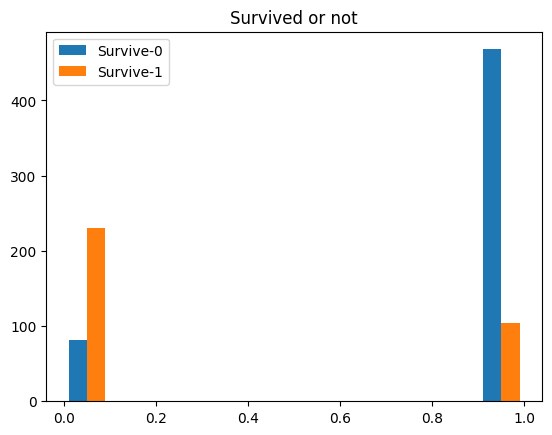

In [24]:
plt.hist([df3,df4],label=["Survive-0","Survive-1"])
plt.title("Survived or not")
plt.legend()
plt.show()

# Scalling and ModelBuilding

In [25]:
X = df2.drop(["Survived"],axis=1)

In [26]:
y = df2.Survived

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scale = MinMaxScaler()

In [29]:
X = scale.fit_transform(X)

In [30]:
X

array([[1.        , 1.        , 0.26582278],
       [0.        , 0.        , 0.46835443],
       [1.        , 0.        , 0.3164557 ],
       ...,
       [1.        , 0.        , 0.36708861],
       [0.        , 1.        , 0.3164557 ],
       [1.        , 1.        , 0.39240506]])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.20 , random_state=42)

In [32]:
X_train.shape

(707, 3)

In [33]:
y_train.shape

(707,)

In [34]:
X_test.shape

(177, 3)

In [35]:
y_test.shape

(177,)

# Model Building Using LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lg = LogisticRegression()

In [38]:
lg.fit(X_train,y_train)

LogisticRegression()

In [39]:
lg.score(X_test,y_test)

0.7570621468926554

# Model Building using RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(X_train,y_train)

RandomForestClassifier()

# Accuray

In [43]:
rf.score(X_test,y_test)

0.7853107344632768

# predicted value

In [44]:
rf_pred = rf.predict(X_test)
rf_pred[:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [45]:
y_test[:10]

44     1
390    1
641    1
743    0
886    0
846    0
335    0
301    1
121    0
866    1
Name: Survived, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_test,rf_pred)

In [48]:
cm

array([[93, 17],
       [21, 46]], dtype=int64)

In [49]:
import seaborn as sns

<Axes: >

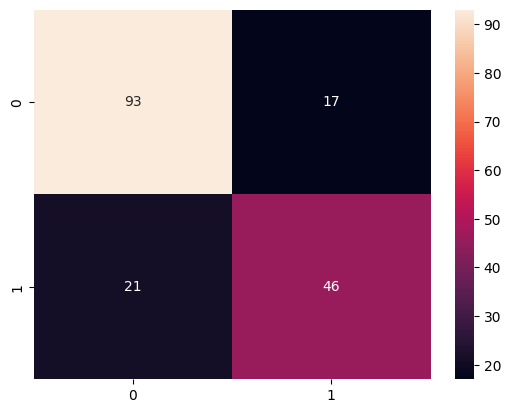

In [50]:
sns.heatmap(cm,annot=True)

# Report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       114
           1       0.69      0.73      0.71        63

    accuracy                           0.79       177
   macro avg       0.77      0.77      0.77       177
weighted avg       0.79      0.79      0.79       177

